# Import the libraries

**Libraries Required**


In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

# Importing COVID-19 Dataset

In [91]:
confirmed_df=pd.read_csv("time_series_covid19_confirmed_global.csv")
death_df=pd.read_csv("time_series_covid19_deaths_global.csv")
recovered_df=pd.read_csv("time_series_covid19_recovered_global.csv")

In [93]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [95]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [97]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [99]:
confirmed_df.info()
confirmed_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [101]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [103]:
confirmed_df.isnull().sum

<bound method DataFrame.sum of      Province/State  Country/Region    Lat   Long  1/22/20  1/23/20  1/24/20  \
0              True           False  False  False    False    False    False   
1              True           False  False  False    False    False    False   
2              True           False  False  False    False    False    False   
3              True           False  False  False    False    False    False   
4              True           False  False  False    False    False    False   
..              ...             ...    ...    ...      ...      ...      ...   
261            True           False  False  False    False    False    False   
262            True           False  False  False    False    False    False   
263            True           False  False  False    False    False    False   
264            True           False  False  False    False    False    False   
265            True           False  False  False    False    False    False   

     1/2

In [203]:
confirmed_df.isnull()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [205]:
confirmed_df.fillna(0, inplace=True)

In [207]:
confirmed_df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
9/17/20           0
9/18/20           0
9/19/20           0
9/20/20           0
9/21/20           0
Length: 248, dtype: int64

In [105]:
confirmed_df.fillna(0, inplace=True)

In [107]:
### converting data to proper format

data_confirmed= confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                                 var_name="Date",value_name="confirmed_case")
data_confirmed["Date"]=pd.to_datetime(data_confirmed["Date"])

In [109]:
data1_country = data_confirmed.groupby(["Country/Region", "Date"])["confirmed_case"].sum().reset_index()

In [111]:
print(data1_country)

      Country/Region       Date  confirmed_case
0        Afghanistan 2020-01-22               0
1        Afghanistan 2020-01-23               0
2        Afghanistan 2020-01-24               0
3        Afghanistan 2020-01-25               0
4        Afghanistan 2020-01-26               0
...              ...        ...             ...
45867       Zimbabwe 2020-09-17            7633
45868       Zimbabwe 2020-09-18            7647
45869       Zimbabwe 2020-09-19            7672
45870       Zimbabwe 2020-09-20            7683
45871       Zimbabwe 2020-09-21            7683

[45872 rows x 3 columns]


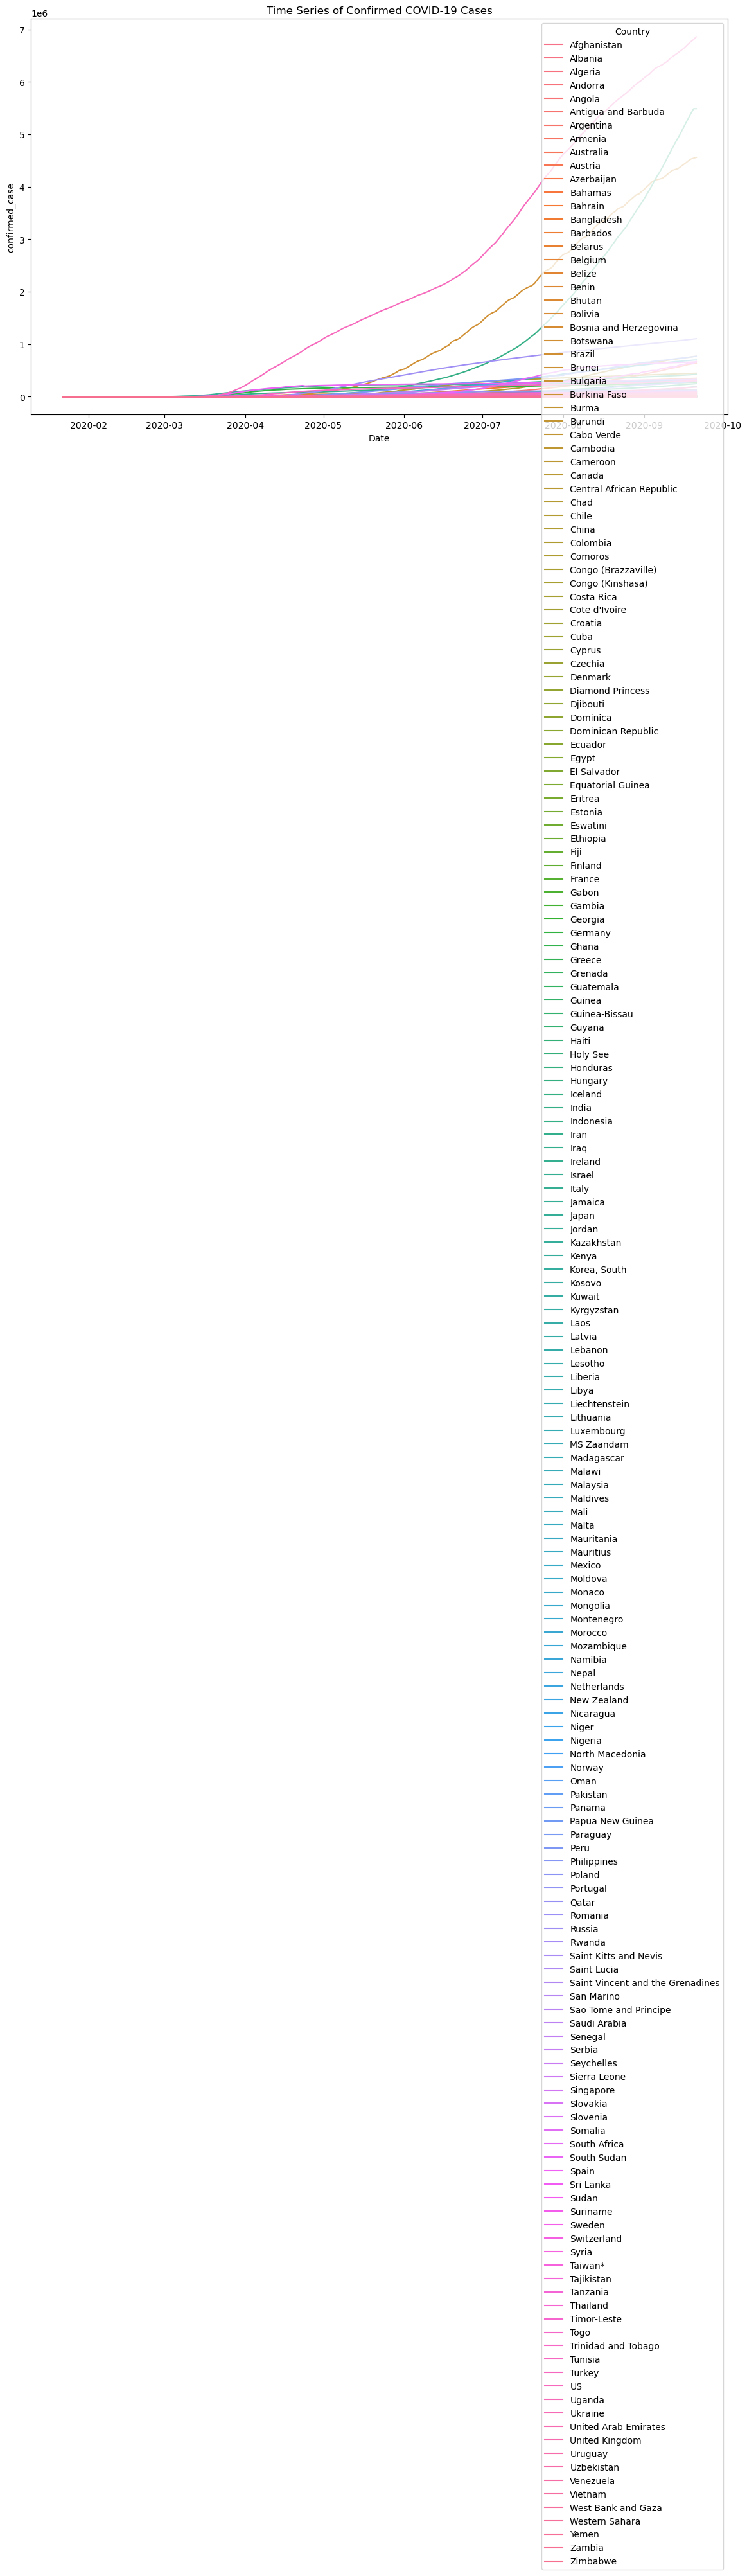

In [209]:
# Plot the time series

plt.figure(figsize=(14,8))
sns.lineplot(data=data_confirmed, x='Date', y= 'confirmed_case', hue='Country/Region')
plt.title('Time Series of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('confirmed_case')
plt.legend(title='Country')
plt.show()

In [191]:
#converting data to a proper format

data_melted = confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
                    var_name="Date", value_name="Confirmed_Cases")
data_melted["Date"] = pd.to_datetime(data_melted["Date"])

In [193]:
data_country = data_melted.groupby(["Country/Region", "Date"])["Confirmed_Cases"].sum().reset_index()

In [195]:
print(data_country)

      Country/Region       Date  Confirmed_Cases
0        Afghanistan 2020-01-22                0
1        Afghanistan 2020-01-23                0
2        Afghanistan 2020-01-24                0
3        Afghanistan 2020-01-25                0
4        Afghanistan 2020-01-26                0
...              ...        ...              ...
45867       Zimbabwe 2020-09-17             7633
45868       Zimbabwe 2020-09-18             7647
45869       Zimbabwe 2020-09-19             7672
45870       Zimbabwe 2020-09-20             7683
45871       Zimbabwe 2020-09-21             7683

[45872 rows x 3 columns]


In [197]:
data_global = data_melted.groupby("Date")["Confirmed_Cases"].sum().reset_index()

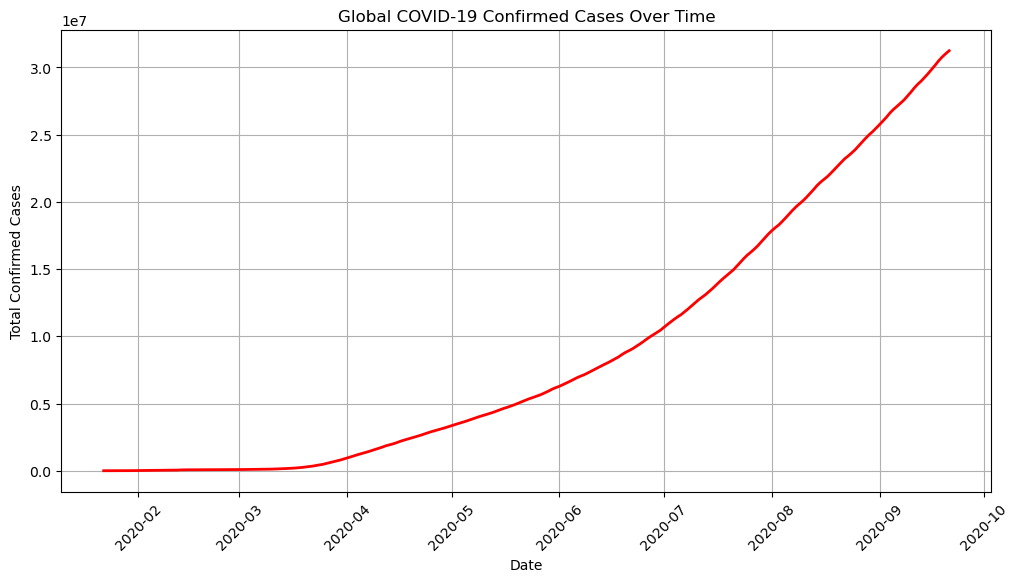

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(data_global["Date"], data_global["Confirmed_Cases"], color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

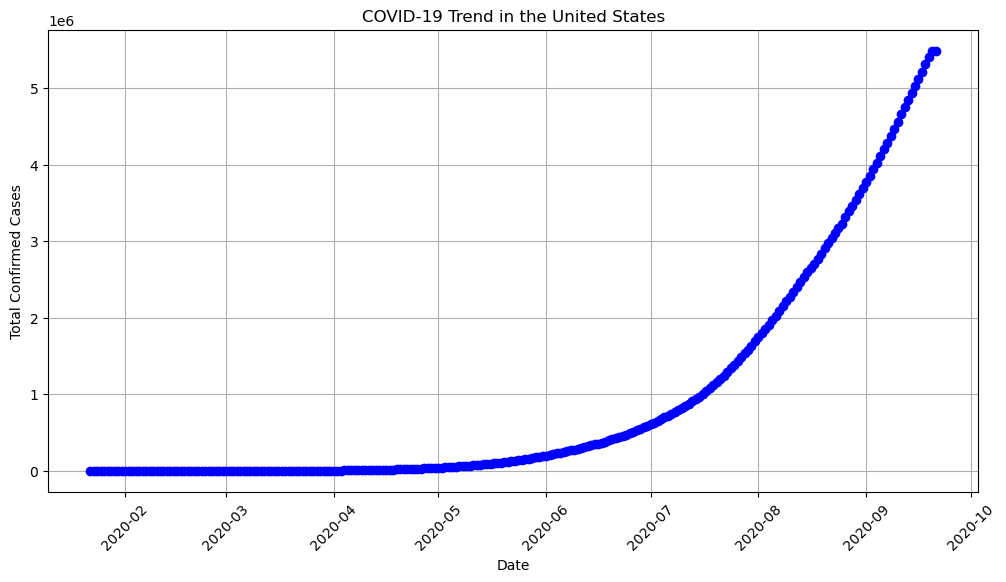

In [211]:
#specific country eg: India
india_data = data_country[data_country["Country/Region"] == "India"]

plt.figure(figsize=(12, 6))
plt.plot(india_data["Date"], india_data["Confirmed_Cases"], marker="o", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.title("COVID-19 Trend in the United States")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

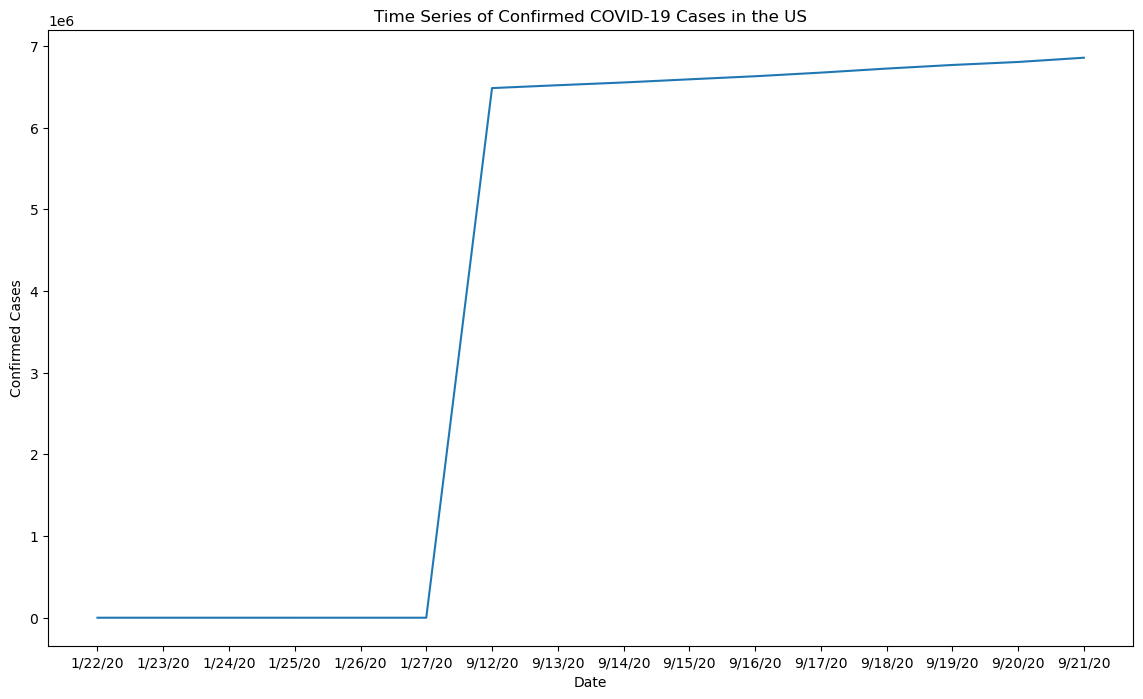

In [215]:
# Analyze a specific country (e.g., US)
us_data = confirmed_df[confirmed_df['Country/Region'] == 'US']

# Plot the time series for the US
us_melted = us_data.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], 
                         value_vars=date_columns, var_name='Date', value_name='Confirmed Cases')

plt.figure(figsize=(14, 8))
sns.lineplot(data=us_melted, x='Date', y='Confirmed Cases')
plt.title('Time Series of Confirmed COVID-19 Cases in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

In [221]:
date_columns = confirmed_df.columns[4:]
latest_date = confirmed_df.columns[-1]  # The last column is the latest date
latest_cases = confirmed_df.groupby('Country/Region')[latest_date].sum().reset_index()
latest_cases.columns = ['Country/Region', 'Confirmed_Cases']
top_countries = latest_cases.nlargest(10, 'Confirmed_Cases')

# Top 10 countries that has been given maximum number of covid cases

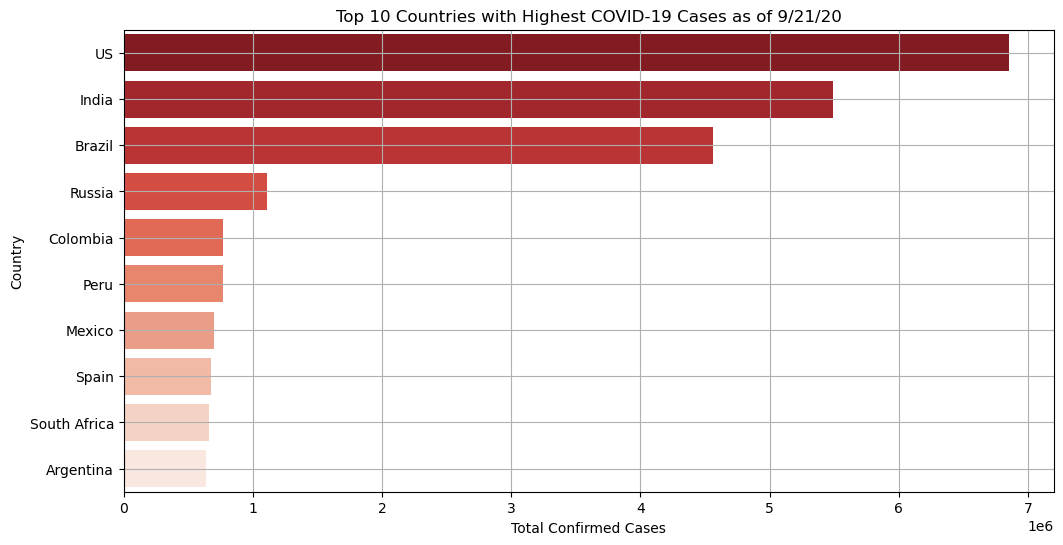

In [223]:
# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed_Cases', y='Country/Region', data=top_countries, palette='Reds_r')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.title(f'Top 10 Countries with Highest COVID-19 Cases as of {latest_date}')
plt.grid(True)
plt.show()

In [225]:
# Summary of findings
print("Summary of Findings:")
print("1. The top countries with the highest number of confirmed COVID-19 cases are:US, India, Brazil, Russia, Colombia, Peru, Mexico, Spain, South Africa, Argentina")
print("2. The time series analysis shows a rapid increase in confirmed cases globally, with some countries experiencing significant spikes.")
print("3. The US has one of the highest numbers of confirmed cases, with a steep increase over time.")

Summary of Findings:
1. The top countries with the highest number of confirmed COVID-19 cases are:US, India, Brazil, Russia, Colombia, Peru, Mexico, Spain, South Africa, Argentina
2. The time series analysis shows a rapid increase in confirmed cases globally, with some countries experiencing significant spikes.
3. The US has one of the highest numbers of confirmed cases, with a steep increase over time.


#### Death cases

In [228]:
death_df=pd.read_csv("time_series_covid19_deaths_global.csv")

In [230]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [232]:
death_df.isnull().sum

<bound method DataFrame.sum of      Province/State  Country/Region    Lat   Long  1/22/20  1/23/20  1/24/20  \
0              True           False  False  False    False    False    False   
1              True           False  False  False    False    False    False   
2              True           False  False  False    False    False    False   
3              True           False  False  False    False    False    False   
4              True           False  False  False    False    False    False   
..              ...             ...    ...    ...      ...      ...      ...   
261            True           False  False  False    False    False    False   
262            True           False  False  False    False    False    False   
263            True           False  False  False    False    False    False   
264            True           False  False  False    False    False    False   
265            True           False  False  False    False    False    False   

     1/2

In [234]:
death_df.fillna(0, inplace=True)

In [236]:
data_death= death_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                                 var_name="Date",value_name="death_case")
data_death["Date"]=pd.to_datetime(data_death["Date"])

In [238]:
data2_country = data_death.groupby(["Country/Region", "Date"])["death_case"].sum().reset_index()

In [240]:
print(data2_country)

      Country/Region       Date  death_case
0        Afghanistan 2020-01-22           0
1        Afghanistan 2020-01-23           0
2        Afghanistan 2020-01-24           0
3        Afghanistan 2020-01-25           0
4        Afghanistan 2020-01-26           0
...              ...        ...         ...
45867       Zimbabwe 2020-09-17         224
45868       Zimbabwe 2020-09-18         224
45869       Zimbabwe 2020-09-19         225
45870       Zimbabwe 2020-09-20         225
45871       Zimbabwe 2020-09-21         225

[45872 rows x 3 columns]


In [242]:
latest_date = confirmed_df.columns[-1]

In [244]:
latest_cases = confirmed_df.groupby('Country/Region')[latest_date].sum().reset_index()
latest_cases.columns = ['Country/Region', 'confirmed_cases']

In [246]:
latest_death = death_df.groupby('Country/Region')[latest_date].sum().reset_index()
latest_death.columns = ['Country/Region', 'death_case']

In [248]:
# Merge the two DataFrames
combined_data = pd.merge(latest_cases, latest_death, on='Country/Region', how='inner')

In [250]:
# Get the top 10 countries by death cases
top_countries = combined_data.nlargest(10, 'death_case')

In [252]:
print(top_countries)

     Country/Region  confirmed_cases  death_case
174              US          6856884      199865
23           Brazil          4558040      137272
79            India          5487580       87882
113          Mexico           700580       73697
178  United Kingdom           401122       41877
85            Italy           299506       35724
134            Peru           768895       31369
62           France           496851       31346
158           Spain           671468       30663
81             Iran           425481       24478


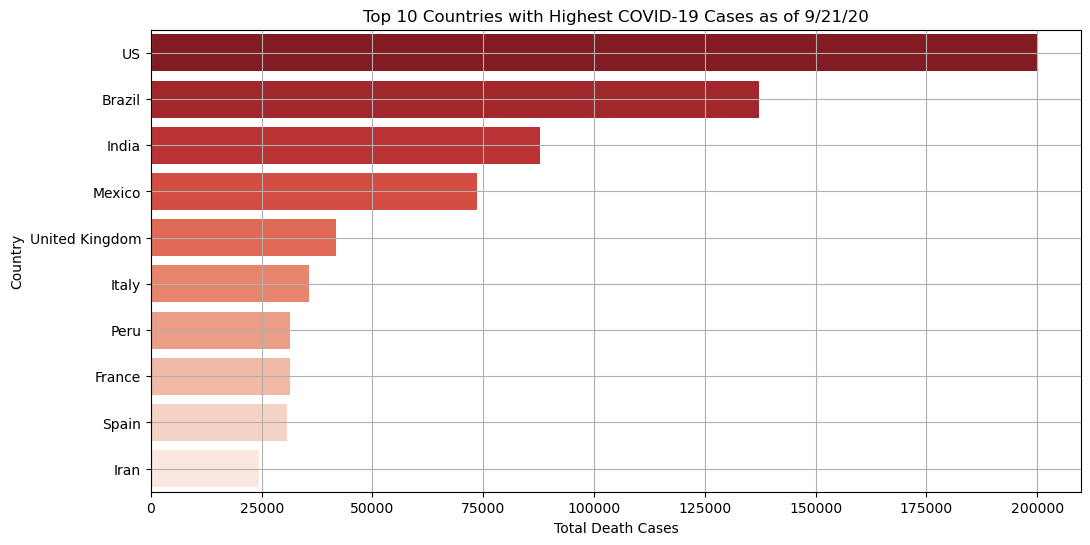

In [254]:
# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='death_case', y='Country/Region', data=top_countries, palette='Reds_r')
plt.xlabel('Total Death Cases')
plt.ylabel('Country')
plt.title(f'Top 10 Countries with Highest COVID-19 Cases as of {latest_date}')
plt.grid(True)
plt.show()

### Recovered Cases

In [257]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [259]:
recovered_df.isnull().sum

<bound method DataFrame.sum of      Province/State  Country/Region    Lat   Long  1/22/20  1/23/20  1/24/20  \
0              True           False  False  False    False    False    False   
1              True           False  False  False    False    False    False   
2              True           False  False  False    False    False    False   
3              True           False  False  False    False    False    False   
4              True           False  False  False    False    False    False   
..              ...             ...    ...    ...      ...      ...      ...   
248            True           False  False  False    False    False    False   
249            True           False  False  False    False    False    False   
250            True           False  False  False    False    False    False   
251            True           False  False  False    False    False    False   
252            True           False  False  False    False    False    False   

     1/2

In [261]:
recovered_df.fillna(0, inplace=True)

In [263]:
data_recovered= recovered_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                         var_name="Date", value_name="recovered_cases")
data_recovered["Date"]=pd.to_datetime(data_recovered["Date"])

In [265]:
data3_country = data_recovered.groupby(["Country/Region", "Date"])["recovered_cases"].sum().reset_index()

In [267]:
print(data3_country)

      Country/Region       Date  recovered_cases
0        Afghanistan 2020-01-22                0
1        Afghanistan 2020-01-23                0
2        Afghanistan 2020-01-24                0
3        Afghanistan 2020-01-25                0
4        Afghanistan 2020-01-26                0
...              ...        ...              ...
45867       Zimbabwe 2020-09-17             5841
45868       Zimbabwe 2020-09-18             5883
45869       Zimbabwe 2020-09-19             5914
45870       Zimbabwe 2020-09-20             5924
45871       Zimbabwe 2020-09-21             5924

[45872 rows x 3 columns]


In [269]:
latest_date = confirmed_df.columns[-1]

In [271]:
# Aggregate confirmed cases and recovered by country
latest_cases = confirmed_df.groupby('Country/Region')[latest_date].sum().reset_index()
latest_cases.columns = ['Country/Region', 'confirmed_cases']

latest_recovered = recovered_df.groupby('Country/Region')[latest_date].sum().reset_index()
latest_recovered.columns = ['Country/Region', 'recovered_cases']

In [273]:
# Merge the two DataFrames
combined_data = pd.merge(latest_cases, latest_recovered, on='Country/Region', how='inner')

In [275]:
# Get the top 10 countries by death cases
top_countries = combined_data.nlargest(10, 'recovered_cases')
print(top_countries)

    Country/Region  confirmed_cases  recovered_cases
79           India          5487580          4396399
23          Brazil          4558040          3993432
174             US          6856884          2615949
140         Russia          1105048           909026
37        Colombia           770435           640900
134           Peru           768895           607837
113         Mexico           700580           596317
156   South Africa           661936           591208
6        Argentina           640147           508563
35           Chile           447468           421111


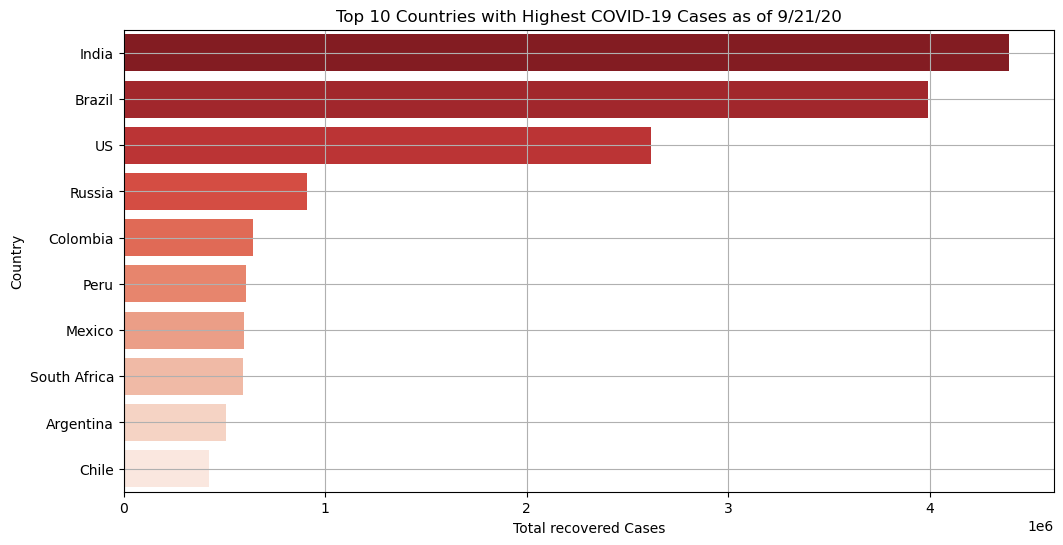

In [277]:
# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='recovered_cases', y='Country/Region', data=top_countries, palette='Reds_r')
plt.xlabel('Total recovered Cases')
plt.ylabel('Country')
plt.title(f'Top 10 Countries with Highest COVID-19 Cases as of {latest_date}')
plt.grid(True)
plt.show()

In [279]:
# Summary of findings
print("Summary of Findings:")
print("1. The top countries with the highest number of confirmed COVID-19 cases are:US, India, Brazil, Russia, Colombia, Peru, Mexico, Spain, South Africa, Argentina")
print("2. The time series analysis shows a rapid increase in confirmed cases globally, with some countries experiencing significant spikes.")
print("3. The US has one of the highest numbers of confirmed cases, with a steep increase over time.")
print("4.The top countries with the highest number of confirmed COVID-19 Death cases are: US, Brazil, India, Mexico< United Kingdom< Italy, Peru, France, Spain, Iran")
print("5. The top countries with the highest number of COVID-19 Recovered cases are: India, Brazil, Us, Russia, Colombia, Preu, Mexico, South Africa, Argentina, Chile" )

Summary of Findings:
1. The top countries with the highest number of confirmed COVID-19 cases are:US, India, Brazil, Russia, Colombia, Peru, Mexico, Spain, South Africa, Argentina
2. The time series analysis shows a rapid increase in confirmed cases globally, with some countries experiencing significant spikes.
3. The US has one of the highest numbers of confirmed cases, with a steep increase over time.
4.The top countries with the highest number of confirmed COVID-19 Death cases are: US, Brazil, India, Mexico< United Kingdom< Italy, Peru, France, Spain, Iran
5. The top countries with the highest number of COVID-19 Recovered cases are: India, Brazil, Us, Russia, Colombia, Preu, Mexico, South Africa, Argentina, Chile


In [281]:
confirmed_df=pd.read_csv("time_series_covid19_confirmed_global.csv")

In [283]:
# Filter data for a specific country 
country = "US"
country_data = confirmed_df[confirmed_df['Country/Region'] == country]

In [285]:
# Drop unnecessary columns
country_data = country_data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [287]:
# Transpose the data to have dates as rows
country_data = country_data.T
country_data.index = pd.to_datetime(country_data.index)
country_data.columns = ['Confirmed Cases']

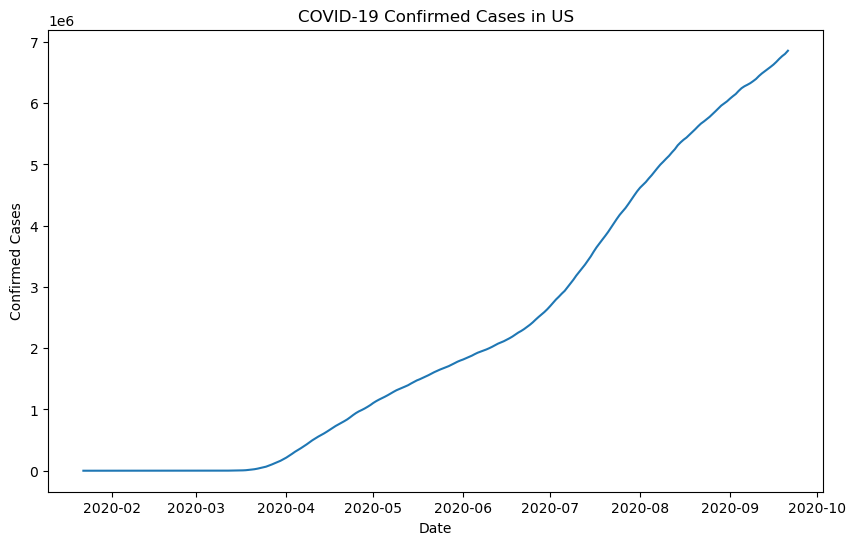

In [289]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(country_data)
plt.title(f'COVID-19 Confirmed Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()


In [291]:
# Split the data into training and testing sets
train_size = int(len(country_data) * 0.8)
train, test = country_data[0:train_size], country_data[train_size:]

In [293]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [295]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [297]:
# Forecast future cases
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

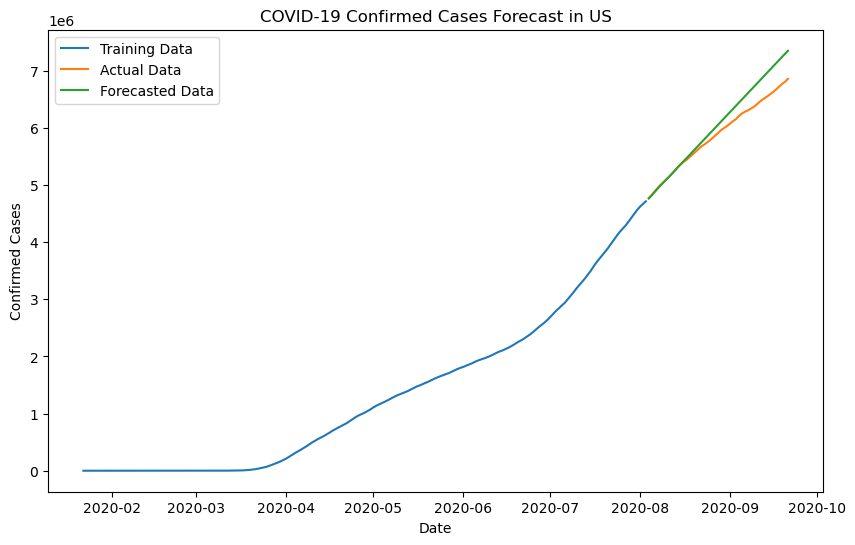

In [299]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(forecast, label='Forecasted Data')
plt.title(f'COVID-19 Confirmed Cases Forecast in {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [301]:
# Evaluate the model
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 186537.0785061819
Root Mean Squared Error (RMSE): 251166.7955702858


In [303]:
death_df=pd.read_csv("time_series_covid19_deaths_global.csv")

In [305]:
country = "US"
country_data = death_df[death_df['Country/Region'] == country]

In [307]:
country_data = country_data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [309]:
# Transpose the data to have dates as rows
country_data = country_data.T
country_data.index = pd.to_datetime(country_data.index)
country_data.columns = ['Deaths']

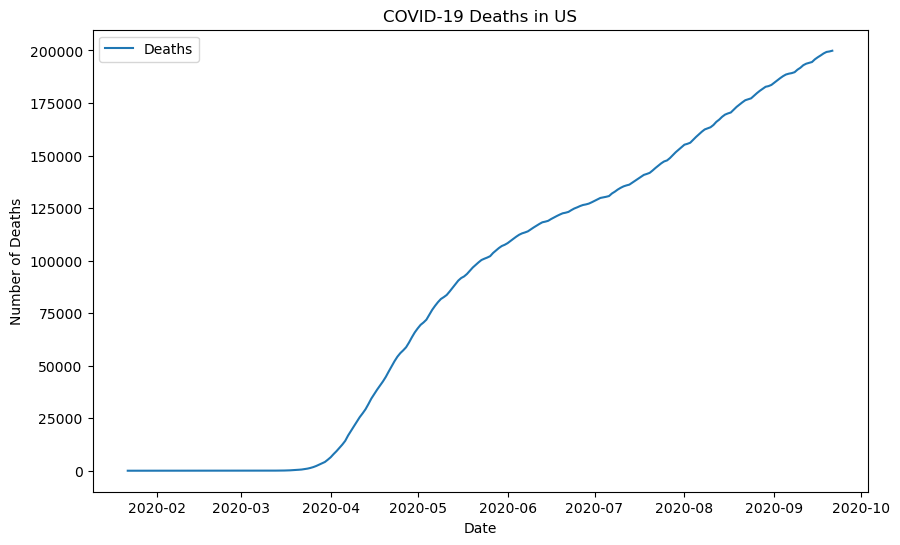

In [311]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Deaths'], label='Deaths')
plt.title(f'COVID-19 Deaths in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

In [313]:
# Split the data into training and testing sets
train_size = int(len(country_data) * 0.8)
train, test = country_data[:train_size], country_data[train_size:]

In [315]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()


C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Prajwal Bm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [317]:
# Forecast future cases
forecast = model_fit.forecast(steps=len(test))

In [319]:
# Evaluate the model
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 6546.804730524798
Root Mean Squared Error: 7286.297188275776


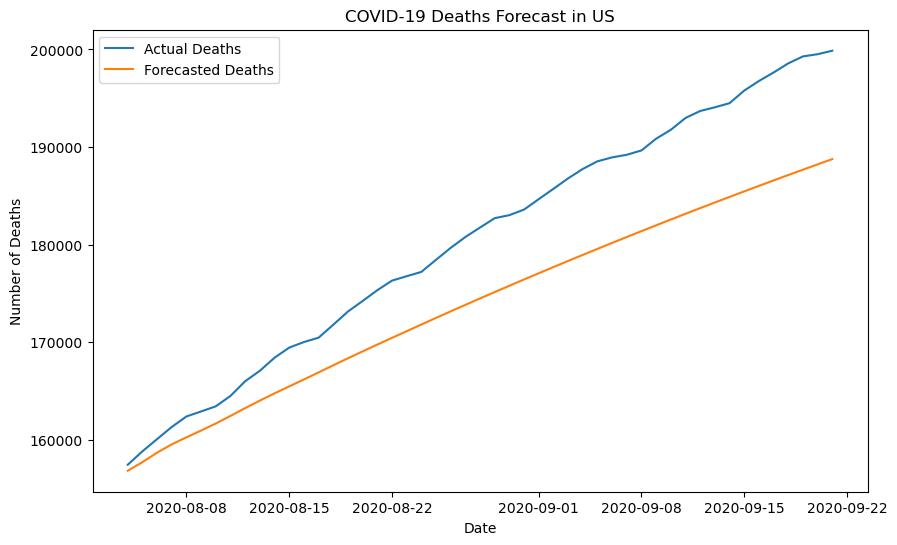

In [321]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Deaths')
plt.plot(test.index, forecast, label='Forecasted Deaths')
plt.title(f'COVID-19 Deaths Forecast in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [325]:
confirmed_df=pd.read_csv("time_series_covid19_confirmed_global.csv")

In [327]:
# Filter data for a specific country/region (e.g., India)
country_data = confirmed_df[confirmed_df['Country/Region'] == 'India']

In [329]:
# Drop unnecessary columns
country_data = country_data.drop(columns=['Province/State', 'Lat', 'Long'])

In [331]:
# Transpose the data to have dates as rows
country_data = country_data.T

country_data.columns = ['Confirmed Cases']

In [333]:
# Convert the index to datetime
country_data = country_data.iloc[1:]
country_data.index = pd.to_datetime(country_data.index)

country_data.head()

,Confirmed Cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


### Data Visualization

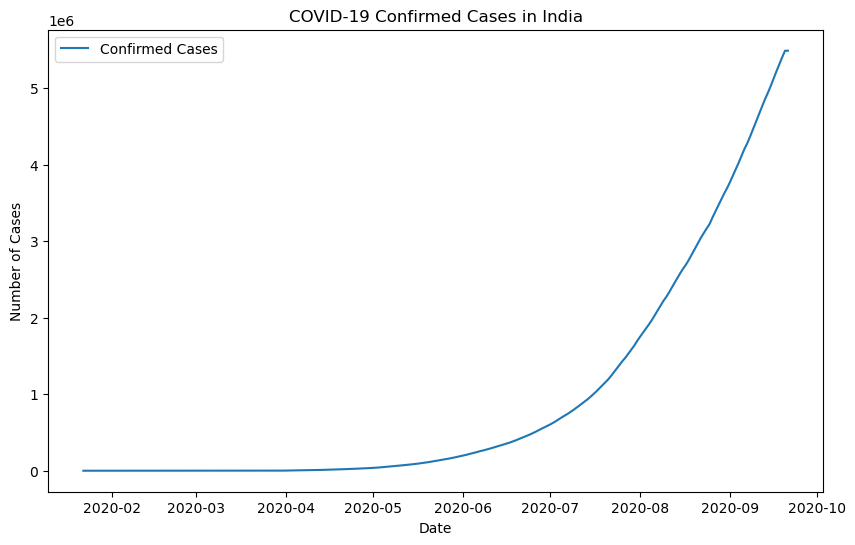

In [339]:
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Confirmed Cases'], label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [341]:
#  Prepare Data for Prediction
X = np.arange(len(country_data)).reshape(-1, 1)
y = country_data['Confirmed Cases'].values

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
## Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [347]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 679145905033.223


In [349]:
# Make Future Predictions
future_days = 30
future_X = np.arange(len(country_data), len(country_data) + future_days).reshape(-1, 1)
future_y = model.predict(future_X)

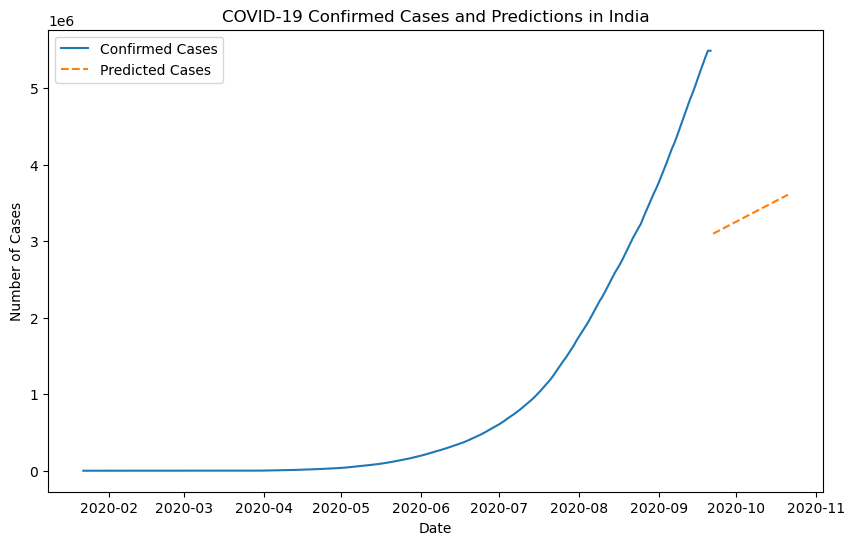

In [351]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data['Confirmed Cases'], label='Confirmed Cases')
plt.plot(pd.date_range(start=country_data.index[-1], periods=future_days + 1, freq='D')[1:], future_y, label='Predicted Cases', linestyle='--')
plt.title('COVID-19 Confirmed Cases and Predictions in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [353]:
# Export the Predictions
future_dates = pd.date_range(start=country_data.index[-1], periods=future_days + 1, freq='D')[1:]
predictions = pd.DataFrame({'Date': future_dates, 'Predicted Cases': future_y})
predictions.to_csv('covid_predictions_India.csv', index=False)

## Recommendations for Government Health Department

- **Increase Testing & Surveillance:** More testing centers should be set up in areas with rising cases.
- **Prepare Healthcare Facilities:** Ensure hospitals have enough ICU beds, ventilators, and medical staff.
- **Enforce Social Distancing:** Implement lockdowns or restrictions in high-risk areas.
- **Vaccination Drives:** Accelerate mass vaccination efforts to reduce severe cases and deaths.
- **Public Awareness:** Educate people about hygiene, mask usage, and social distancing.

In [363]:
# Task 3: Government Health Department Suggestions

print("Suggestions for the Government Health Department:")
print("1. Implement stricter lockdown measures in peak periods based on predictions.")
print("2. Increase medical resources in hospitals anticipating case surges.")
print("3. Allocate vaccines efficiently based on high-risk periods.")
print("4. Strengthen public health awareness campaigns.")

Suggestions for the Government Health Department:
1. Implement stricter lockdown measures in peak periods based on predictions.
2. Increase medical resources in hospitals anticipating case surges.
3. Allocate vaccines efficiently based on high-risk periods.
4. Strengthen public health awareness campaigns.
